In [23]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
import seaborn as sns
from scipy import misc
import io
import networkx as nx




%matplotlib inline

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f04ff3af780>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/pydotplus/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f04ff3af6d8>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/pydotplus/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f04ff3af588>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/pydotplus/
  Retrying (Retry(total=1, connect

In [3]:
!wget -N https://cdn.discordapp.com/attachments/599120338546196482/599135889964138515/data.csv
data = pd.read_csv('./data.csv', sep = ',')
data.describe()

--2019-07-12 14:53:52--  https://cdn.discordapp.com/attachments/599120338546196482/599135889964138515/data.csv
Resolving cdn.discordapp.com (cdn.discordapp.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘cdn.discordapp.com’


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
train , test = train_test_split(data, test_size  = 0.15)

In [5]:
print("Training Size : {} ; Test Size : {}".format(len(train) , len(test)))

Training Size : 1714 ; Test Size : 303


In [6]:
data['target'].value_counts()


1    1020
0     997
Name: target, dtype: int64

In [7]:
train.shape


(1714, 17)

In [8]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance  = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


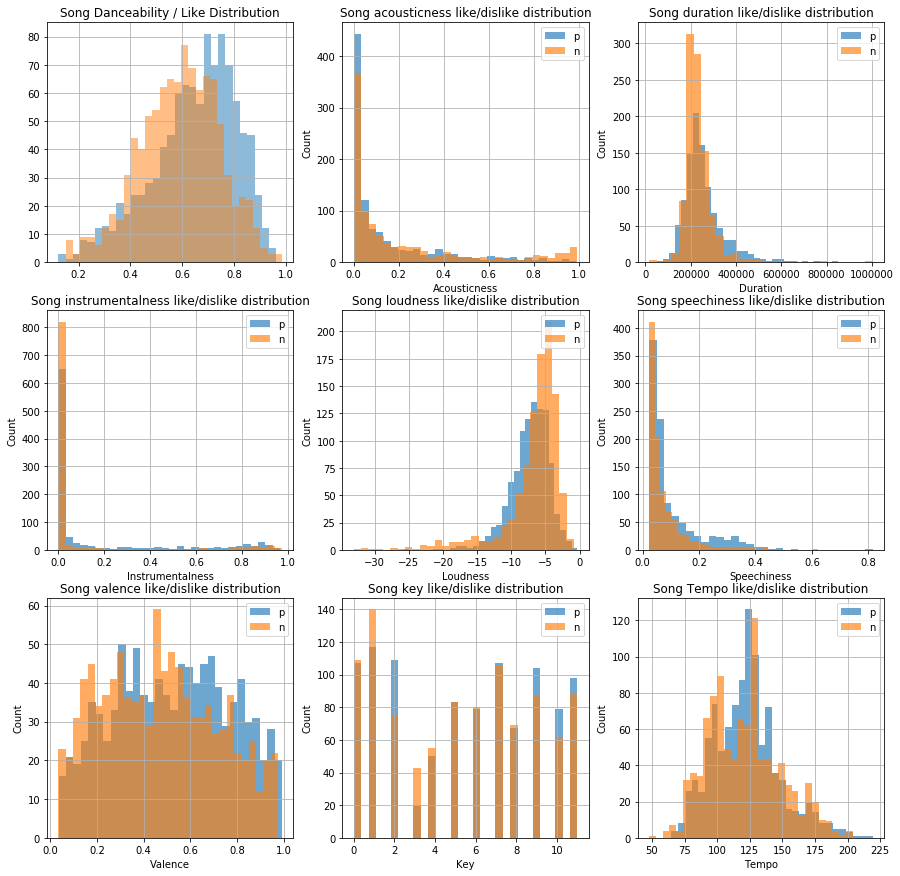

In [9]:


fig2 = plt.figure(figsize= (15,15))

ax1 = fig2.add_subplot(339)
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Count')
ax1.set_title('Song Tempo like/dislike distribution')
pos_tempo.hist(alpha = 0.65, bins = 30, label = 'p', )
neg_tempo.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")

#Danceability

ax3 = fig2.add_subplot(331)
ax3.set_xlabel =('Danceability')
ax3.set_ylabel =('Count')
ax3.set_title("Song Danceability / Like Distribution")
pos_dance.hist(alpha = 0.5 , bins = 30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5 , bins =30)

#acousticness
ax4 = fig2.add_subplot(332)
ax4.set_xlabel('Acousticness')
ax4.set_ylabel('Count')
ax4.set_title('Song acousticness like/dislike distribution')
pos_acousticness.hist(alpha = 0.65, bins = 30, label = 'p', )
neg_acousticness.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")

#duration_ms
ax5 = fig2.add_subplot(333)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song duration like/dislike distribution')
pos_duration.hist(alpha = 0.65, bins = 30, label = 'p', )
neg_duration.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")

#instrumentalness
ax6 = fig2.add_subplot(334)
ax6.set_xlabel('Instrumentalness')
ax6.set_ylabel('Count')
ax6.set_title('Song instrumentalness like/dislike distribution')
pos_instrumentalness.hist(alpha = 0.65, bins = 30, label = 'p', )
neg_instrumentalness.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")

#loudness
ax7 = fig2.add_subplot(335)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song loudness like/dislike distribution')
pos_loudness.hist(alpha = 0.65, bins = 30, label = 'p', )
neg_loudness.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")

#Speechiness
ax8 = fig2.add_subplot(336)
ax8.set_xlabel('Speechiness')
ax8.set_ylabel('Count')
ax8.set_title('Song speechiness like/dislike distribution')
pos_speechiness.hist(alpha = 0.65, bins = 30, label = 'p', )
neg_speechiness.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")

#valence
ax9 = fig2.add_subplot(337)
ax9.set_xlabel('Valence')
ax9.set_ylabel('Count')
ax9.set_title('Song valence like/dislike distribution')
pos_valence.hist(alpha = 0.65, bins = 30, label = 'p', )
neg_valence.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")

#key
ax10 = fig2.add_subplot(338)
ax10.set_xlabel('Key')
ax10.set_ylabel('Count')
ax10.set_title('Song key like/dislike distribution')
pos_key.hist(alpha = 0.65, bins = 30, label = 'p',)
neg_key.hist(alpha = 0.65, bins = 30, label = 'n', )
plt.legend(loc = "upper right")



In [47]:
c= DecisionTreeClassifier(min_samples_split = 2)

In [11]:
features = ["danceability", "acousticness", "duration_ms", "instrumentalness", "loudness", "speechiness", "valence", "key", "tempo"]

In [48]:
xtrain = train[features]
ytrain = train["target"]
 
xtest = test[features]
ytest = test["target"]

In [49]:
dt = c.fit(xtrain , ytrain)

In [37]:
def showtree(tree, features ,path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f , feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = [20,20]
    plt.imshow(img)

In [53]:
#showtree(dt , features , "dectree1.png")

In [55]:
ypred = c.predict(xtest)

In [56]:
ypred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [51]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest,ypred) * 100

In [52]:
print("Accuracy using Decision Tree : ", round(score,1) ,"%")

Accuracy using Decision Tree :  70.6 %
